seaborn package not available.


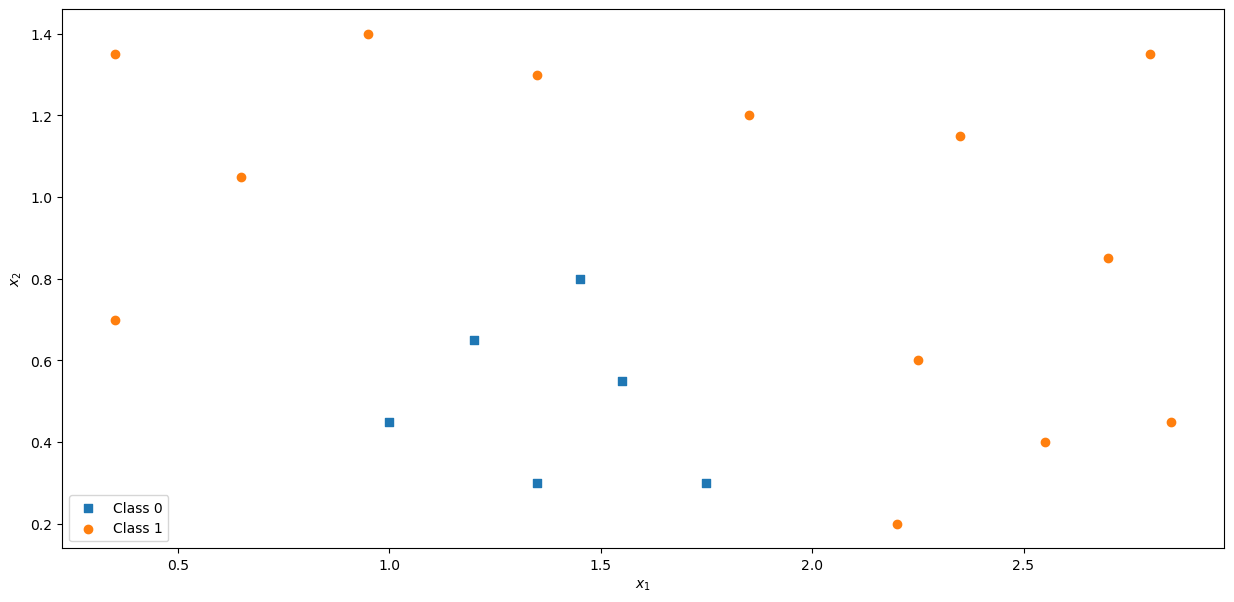

In [1]:
import numpy as np
from matplotlib import pyplot as plt
try:
    import seaborn  # provides fancy plotting styles
    seaborn.set_style('darkgrid')
except:
    print('seaborn package not available.')

X = np.array([[0.35, 0.7], [0.35, 1.35], [0.65, 1.05], [0.95, 1.4], [1.35, 1.3], [1.85, 1.2], [2.35, 1.15], [2.25, 0.6], [2.2, 0.2], [2.55, 0.4], [2.7, 0.85], [2.8, 1.35], [2.85, 0.45],
              [1, 0.45], [1.2, 0.65], [1.35, 0.3], [1.45, 0.8], [1.55, 0.55], [1.75, 0.3]])
y = np.array([1] * 13 + [0] * 6)

plt.figure(figsize=(15,7))
plt.scatter(*X[y==0].T, marker='s', label="Class 0")
plt.scatter(*X[y==1].T, marker='o', label="Class 1")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

## Task I: Linear Classification
The dataset (X,y) poses a 2d classification problem: Each pair $(x_1,x_2)$ of features is associated to one of the two classes, 0 or 1.

1. Explain why the classes are not linearly separable if we consider the feature vectors $\mathbf{x}=(x_1,x_2)^T$.
2. Does the situation change if we write the same points as higher-dimensional feature vectors $\mathbf{x}=(x_1,x_1^2,x_2)^T$?  
   Visualize the features in a [3d scatter plot](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) and look at 2d scatter plots of $(x_1, x_1^2)$ and $(x_1^2,x_2)$.

To 1.: If we consider feature vectors $\textbf{x} = (x_1,x_2)^T$ we are not able to fit a linear decision boundary $y=w*\textbf{x}+b$ that perfectly separates the two classes $0$ and $1$. Because $p(\textbf{x}|C_0)$ and $p(\textbf{x}|C_1)$ have overlapping regions

To 2.: No, the situation does not change. After polynomial preprocessing, we are still not able to fit a linear decision boundary to separated the two classes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/25/9gh5l4hd4tdf5p5rf__6g4n40000gn/T/ipykernel_98793/1762976447.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


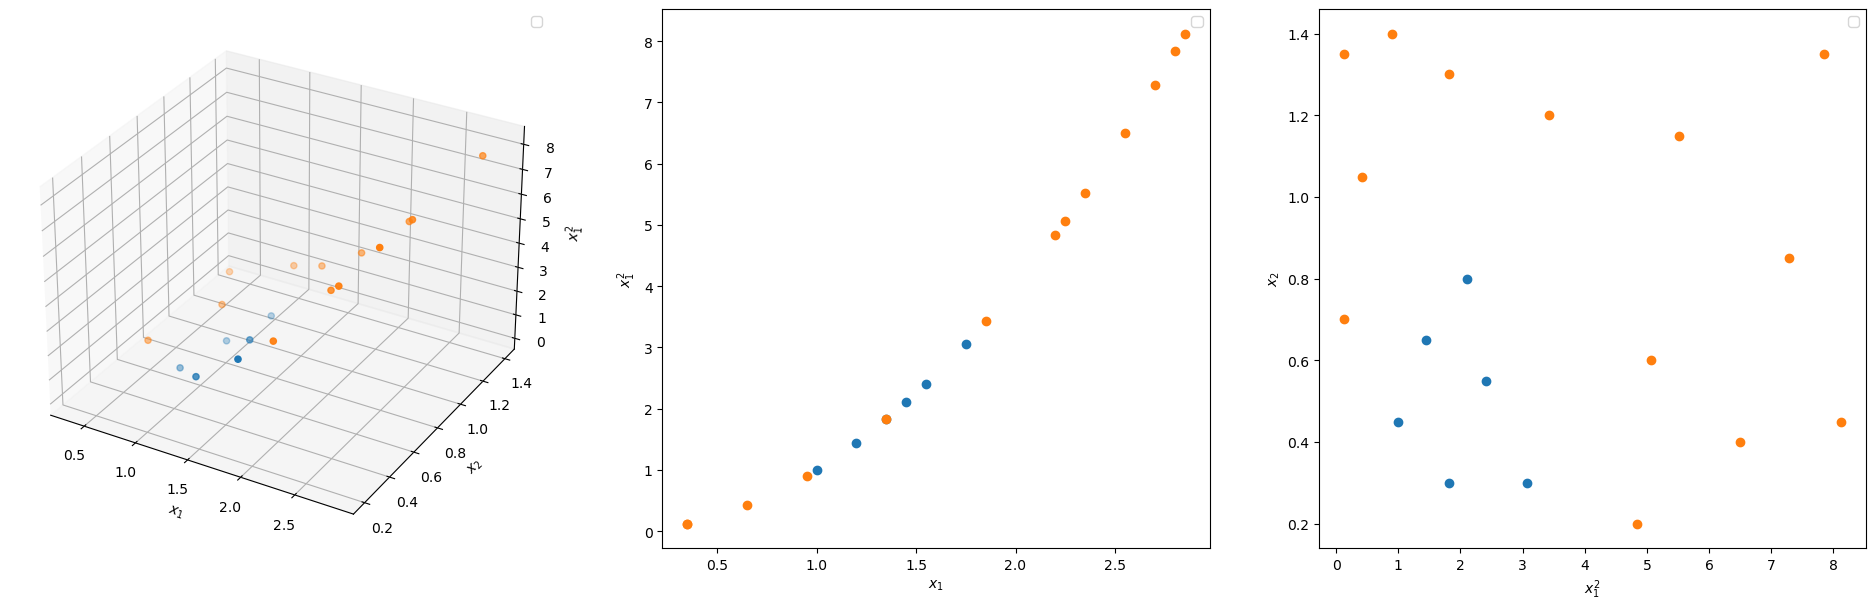

In [2]:
from mpl_toolkits.mplot3d import Axes3D # allow 3d plots
fig = plt.figure(figsize=(24, 7))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[y==0][:,0],X[y==0][:,1],X[y==0][:,0]**2)
ax.scatter(X[y==1][:,0],X[y==1][:,1],X[y==1][:,0]**2)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1^2$')
ax.legend()
ax.grid(True)

ax = fig.add_subplot(132)
ax.scatter(X[y==0][:,0],X[y==0][:,0]**2)
ax.scatter(X[y==1][:,0],X[y==1][:,0]**2)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_1^2$')
ax.legend()

ax = fig.add_subplot(133)
ax.scatter(X[y==0][:,0]**2,X[y==0][:,1])
ax.scatter(X[y==1][:,0]**2,X[y==1][:,1])
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$x_2$')
ax.legend()

fig.show()

## Task II: Fisher-Classification

1. Create a two-dimensional dataset with samples drawn from two Gaussian-distributed classes $C_1$ and $C_2$ as follows:
   - The samples in $C_1$ should have mean $\mu_1 = (1, 0)^T$ and covariance matrix $\Sigma = \begin{pmatrix}  0.5 & -0.3 \\  -0.3 &  0.5\end{pmatrix}$
   - The samples in $C_2$ should have mean $\mu_2 = (-1, 0)^T$ and the same covariance matrix $\Sigma$.

2. Based on the true probability distribution, compute the Fisher discriminant $(\mathbf{w}^*, b^*)$.  
   Project the 2d data onto $\mathbf{w}^*$ and [plot a histogram](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) of those scalars, colored differently based on the class to yield a figure similar to the slide "Nearest Neighbor vs. Fisher Classifier".

3. Draw at random 10, 100, 500 samples from the dataset as training data and compute the Fisher discriminants for these samples, i.e. the empirically determined $(\hat{\mathbf w}, \hat{b})$.  
   How do they differ compared to $(\mathbf{w}^*, b^*)$? Test the classification accuracy of each discriminant on an independent test set comprising 200 samples.

   Plot the training and test samples together with the class boundary computed by the Fisher classifier.

### Reads on Fisher-Classifier (Linear Discriminant Analysis / LDA)

- [Link1](https://sthalles.github.io/fisher-linear-discriminant/)
- [Link2](https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2)
- [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

### II.1 Creating the dataset

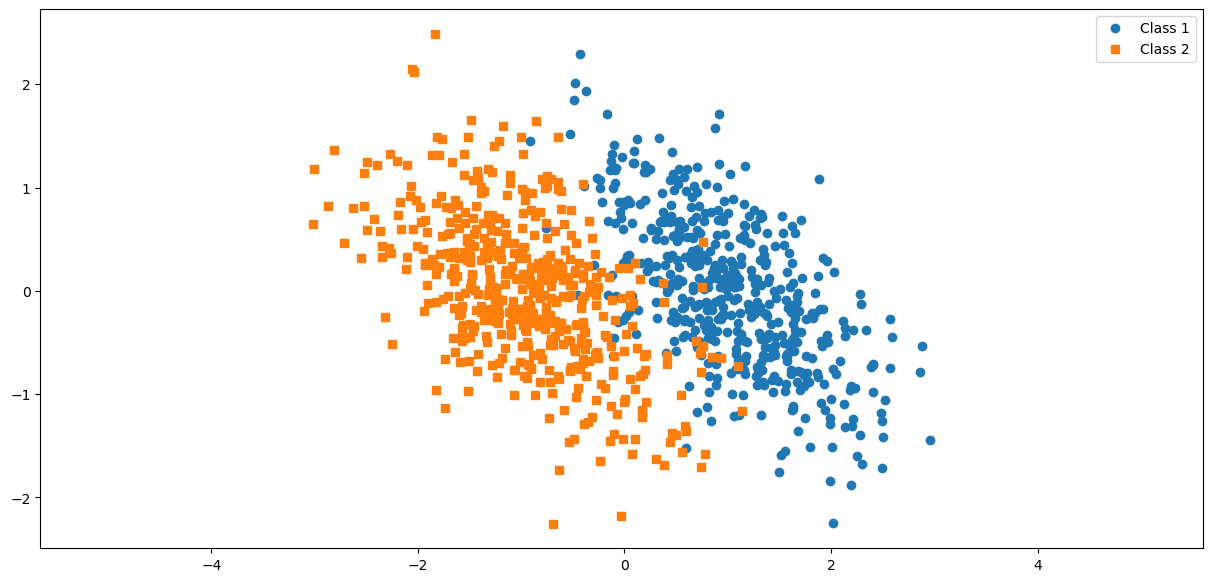

In [3]:
# Define parameters means µ and common covariance matrix Σ
µ = np.array([[1, 0], [-1, 0]])  # µ1 and µ2
Σ = np.array([[ 0.5, -0.3],
              [-0.3,  0.5]])

def sample_data(sample_size = 50):
    samples_class_1 = np.random.multivariate_normal(µ[0], Σ, size=sample_size)
    samples_class_2 = np.random.multivariate_normal(µ[1], Σ, size=sample_size)
    X = np.concatenate([samples_class_1, samples_class_2], axis=0)
    # create arrays of class labels
    Y = np.concatenate([np.zeros(sample_size, dtype=int),  # class 1
                        np.ones(sample_size, dtype=int)])  # class 2

    return X, Y

X, Y = sample_data(500)
plt.figure(figsize=(15, 7))
plt.plot(*X[Y==0].T, 'o', label="Class 1")
plt.plot(*X[Y==1].T, 's', label="Class 2")
plt.axis('equal')
plt.legend()
plt.show()

### II.2. Fisher discriminant
The Fisher discriminant determines the optimal weight $\mathbf w^*$ to linearly separate the two classes.

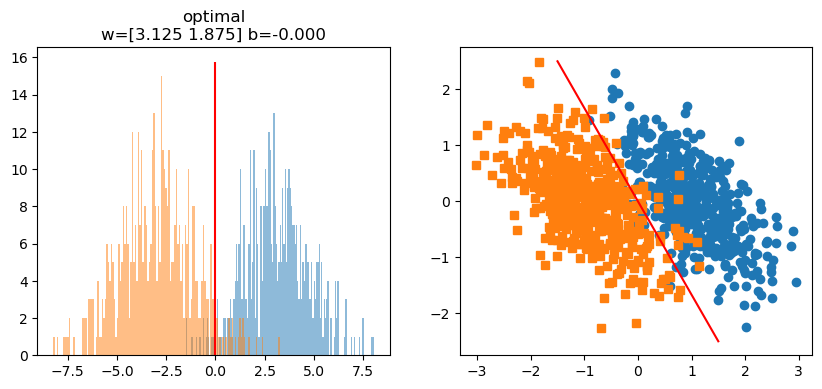

In [4]:
def fisher_discriminant(Σ, µ):
    # # Compute the weights vector
    w = np.dot(np.linalg.inv(2*Σ), µ[0]-µ[1])
    # Compute the bias term
    b = -0.5 * np.dot(w.T, µ[0]+µ[1])
    return w, b

def plot(X, Y, w, b, ax1, ax2, title=''):
    C1 = np.dot(X[Y==0], w)
    C2 = np.dot(X[Y==1], w)

    # histogram plots
    ax1.hist(C1, alpha=0.5, bins=150)
    ax1.hist(C2, alpha=0.5, bins=150)
    # class boundary as vertical red line at bias
    ax1.vlines(b, *ax1.get_ylim(), colors='r')
    np.set_printoptions(precision=3)
    ax1.set_title('{}\nw={} b={:.3f}'.format(title, w, b))

    # scatter plots
    ax2.plot(*X[Y==0].T, 'o', label="Class 0")
    ax2.plot(*X[Y==1].T, 's', label="Class 1")
    # plot class boundary as a red line: x2 = (w1 * x1 + b) / -w2
    xs = np.array([-1.5,1.5])
    ys = (w[0] * xs + b) / -w[1]
    ax2.plot(xs, ys, 'r-', scalex=False, scaley=False)

w_opt, b_opt = fisher_discriminant(Σ, µ)

fig = plt.figure(figsize=(10,4))
plot(X, Y, w_opt, b_opt, fig.add_subplot(121), fig.add_subplot(122), title='optimal')

### Explain, why w is a vector and b is a scalar!

b only shifts the decision boundary and because of that it does not affect its orientation, it is a scalar value rather than a vector. w determines the orientation of the decision boundary and because of that, it is a vector (in a case of a 2d input vector)

### II.3 Fisher classification

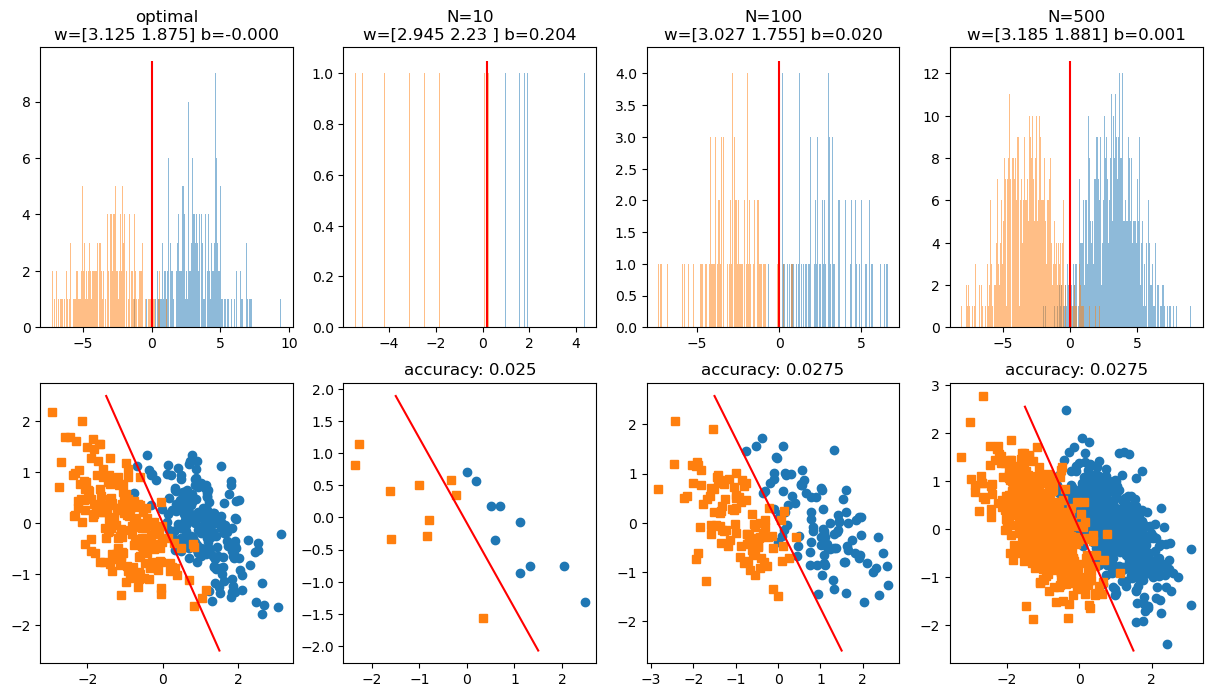

In [5]:
X_test, Y_test = sample_data(200)  # test data set

fig = plt.figure(figsize=(15,8))

plot(X_test, Y_test, w_opt, b_opt, fig.add_subplot(241), fig.add_subplot(245), title='optimal')
for i, size in enumerate([10, 100, 500]):
    # sample training data
    X, Y = sample_data(size)
    # TODO: compute training data statistics
    mean = np.random.rand(2, 2)
    cov  = np.random.rand(2, 2)
    #calculating mean for each class
    mean[0] = np.mean(X[Y == 0], axis=0)
    mean[1] = np.mean(X[Y == 1], axis=0)
    #calculating covariance for each class
    cov_class_0 = np.cov(X[Y == 0], rowvar=False)
    cov_class_1 = np.cov(X[Y == 1], rowvar=False)
    #Assume both classes share the same covariance matrix
    cov = (cov_class_0 + cov_class_1) / 2
   
    
    # compute Fisher discriminant from estimated training data statistics
    w_hat, b_hat = fisher_discriminant(cov, mean)

    plot(X, Y, w_hat, b_hat, fig.add_subplot(2,4,i+2), fig.add_subplot(2,4,i+6), title='N={}'.format(size))
    
    # predict classes on X_test
    Y_pred = (X_test.dot(w_hat) + b_hat > 0).astype(int)
    # accuracy = number of correct classifications / number of test samples
    plt.title('accuracy: {acc}'.format(acc = np.sum(Y_pred == Y_test) / len(Y_test)))


### How do they differ compared to $(\mathbf{w}^*, b^*)$

With increasing number of samples, the error between the optimal and estimated mean/covariances reduces. Due to the law of large numbers

### 

## Task III: Perceptron

Implement a perceptron and the perceptron learning rule to train a linear classification task on a generic dataset $\{(\mathbf{x}^\alpha, c^\alpha)\}_{\alpha \in \{1, \dotsc, M\}}$ with $K$ classes, i.e.: 
* `classify(x)`: $\hat{c}(\mathbf{x}) = \operatorname{argmax}_{i=1, \dotsc K} \mathbf y(\mathbf x)$ where $\mathbf y(\mathbf x) = \mathbf W \cdot \mathbf x$
* `train(x,c,ĉ)`: `if` $\hat{c} \neq c$ (false classification):
  * $\Delta w_{\hat c} = -x_\alpha$ (decrease weight of wrong neuron)
  * $\Delta w_{c} = +x_\alpha$ (increase weight corresponding to correct neuron)

Use numpy matrix expressions to compute the output vector $\mathbf y(\mathbf x)$ (the discriminants) of the perceptron.  
For a multi-class problem, chose $K$ outputs and determine the predicted class via [`argmax`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

To implement the bias term, you can simply augment your feature vectors with a constant $1$: $\mathbf x' = (1, \mathbf x)$.  
Consequently, the weight vectors $\mathbf w$ will have one more dimension as well and you can interpret $w_0$ as the bias term $b$: $\mathbf w' \cdot \mathbf x' = w_0 \cdot 1 +  \mathbf w \cdot \mathbf x$.

In [6]:
class Perceptron():
    def _single_class(self):
        return self.W.shape[1] == 1

    def _train_step(self, x, y):
        y_pred = self.predict(x.reshape((1, -1)))
        
        # TODO: implement update rule for single and multi class
        if self._single_class():
            if y_pred != y:
                if y_pred == 0:  # false negative
                    self.W[1:] += x.reshape((-1, 1))  # add input to weights
                    self.W[0] += 1  # add bias to weights
                else:  # false positive
                    self.W[1:] -= x.reshape((-1, 1))  # subtract input from weights
                    self.W[0] -= 1  # subtract bias from weights
        else:  # multi class
            if y != y_pred:
                self.W[:, y_pred] -= x.reshape((-1, 1))  # subtract input from weights of wrong neuron
                self.W[:, y] += x.reshape((-1, 1))  # add input to weights of correct neuron


    def fit(self, X, y, epochs=2):
        num_classes = len(np.unique(y))
        dim_out = 1 if num_classes <= 2 else num_classes
        self.W = np.random.uniform(-0.01, 0.01, (1+X.shape[1], dim_out)) #include bias term in weights
        for _ in range(epochs):
            for i in np.random.permutation(X.shape[0]):
                self._train_step(X[i], y[i])

    def predict(self, X):
        # TODO: compute discriminant
        discriminant = np.dot(X, self.W[1:]) + self.W[0] # compute discriminant
        if self._single_class():  # decision boundary is at zero
            return (discriminant > 0).astype(int)
        else:  # multi class: winner is class with largest discriminant
            return np.argmax(discriminant, axis=1)


## Task IV: Perceptron Classificaton

Apply your perceptron to the following classification tasks:

1. The feature set from Task I.2, i.e. $\mathbf x = (1, x_1, x_1^2, x_2)^T$. Visualize the class boundary (a plane) in your scatter plot.
2. The dataset from Task II, using 500 samples. Visualize the class boundary and compare your results with Task II.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        13

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       500
           1       0.99      0.91      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



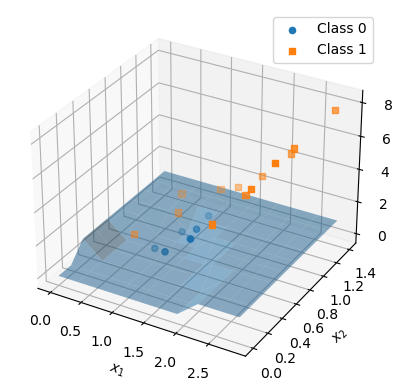

In [8]:
# IV.1 Classifying data from task I.2

X = np.array([[0.35, 0.7], [0.35, 1.35], [0.65, 1.05], [0.95, 1.4], [1.35, 1.3], [1.85, 1.2], [2.35, 1.15], [2.25, 0.6], [2.2, 0.2], [2.55, 0.4], [2.7, 0.85], [2.8, 1.35], [2.85, 0.45],
              [1, 0.45], [1.2, 0.65], [1.35, 0.3], [1.45, 0.8], [1.55, 0.55], [1.75, 0.3]])
Y = np.array([1] * 13 + [0] * 6)

# TODO: Append x_1^2 as feature to X
X = np.concatenate([X, (X[:, 0]**2).reshape(-1, 1)], axis=1)

classifier = Perceptron()
classifier.fit(X, Y, epochs=50)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*X[Y == 0].T, marker='o', label="Class 0")
ax.scatter(*X[Y == 1].T, marker='s', label="Class 1")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1^2$')
ax.legend()

x, y = np.meshgrid(np.linspace(0, np.max(X[:, 0]), 10), np.linspace(0, np.max(X[:, 1]), 10))
# TODO: Compute z by applying the perceptron for all coordinates of the meshgrid
meshgrid = np.array([x.flatten(), y.flatten(), (x**2).flatten()]).T
z = classifier.predict(meshgrid).reshape(x.shape)

ax.plot_surface(x, y, z, alpha=0.5)

Y.shape, X.shape, classifier.predict(X).shape

from sklearn.metrics import classification_report
print(classification_report(Y, classifier.predict(X), zero_division=0))

# IV.2 Classifying data from task II

X, Y = sample_data(500)
classifier = Perceptron()
classifier.fit(X, Y, epochs=50)

print(classification_report(Y, classifier.predict(X), zero_division=0))
